In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
# Import citipy
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

622

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nishihara
Processing Record 2 of Set 1 | bud
Processing Record 3 of Set 1 | saint-joseph
Processing Record 4 of Set 1 | bengkulu
Processing Record 5 of Set 1 | chapais
Processing Record 6 of Set 1 | atuona
Processing Record 7 of Set 1 | ribeira grande
Processing Record 8 of Set 1 | eldorado
Processing Record 9 of Set 1 | saint george
Processing Record 10 of Set 1 | almaty
Processing Record 11 of Set 1 | krasnoye
Processing Record 12 of Set 1 | uhlove
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | hobart
Processing Record 16 of Set 1 | araouane
Processing Record 17 of Set 1 | bayir
Processing Record 18 of Set 1 | tuktoyaktuk
Processing Record 19 of Set 1 | alofi
Processing Record 20 of Set 1 | cumbum
Processing Record 21 of Set 1 | sinkat
City not found. Skipping...
Processing Record 22 of Set 1 | tsihombe
City not found. Skipping

Processing Record 38 of Set 4 | bolshoy tsaryn
City not found. Skipping...
Processing Record 39 of Set 4 | lamu
Processing Record 40 of Set 4 | caravelas
Processing Record 41 of Set 4 | manta
Processing Record 42 of Set 4 | opunake
Processing Record 43 of Set 4 | miraflores
Processing Record 44 of Set 4 | kiama
Processing Record 45 of Set 4 | westport
Processing Record 46 of Set 4 | coquimbo
Processing Record 47 of Set 4 | schneeberg
Processing Record 48 of Set 4 | shyryayeve
Processing Record 49 of Set 4 | auki
Processing Record 50 of Set 4 | butaritari
Processing Record 1 of Set 5 | pisco
Processing Record 2 of Set 5 | ust-nera
Processing Record 3 of Set 5 | nikolskoye
Processing Record 4 of Set 5 | senador jose porfirio
Processing Record 5 of Set 5 | lamar
Processing Record 6 of Set 5 | port elizabeth
Processing Record 7 of Set 5 | kununurra
Processing Record 8 of Set 5 | dera din panah
City not found. Skipping...
Processing Record 9 of Set 5 | ngukurr
City not found. Skipping...
Pr

Processing Record 27 of Set 8 | stokmarknes
Processing Record 28 of Set 8 | riachao das neves
Processing Record 29 of Set 8 | idrinskoye
Processing Record 30 of Set 8 | daru
Processing Record 31 of Set 8 | saint-georges
Processing Record 32 of Set 8 | olafsvik
Processing Record 33 of Set 8 | tiszavasvari
Processing Record 34 of Set 8 | maniitsoq
Processing Record 35 of Set 8 | calvinia
Processing Record 36 of Set 8 | lubango
Processing Record 37 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 38 of Set 8 | port hawkesbury
Processing Record 39 of Set 8 | te anau
Processing Record 40 of Set 8 | channel-port aux basques
Processing Record 41 of Set 8 | ilulissat
Processing Record 42 of Set 8 | tautira
Processing Record 43 of Set 8 | paytug
City not found. Skipping...
Processing Record 44 of Set 8 | marsaxlokk
Processing Record 45 of Set 8 | thilogne
City not found. Skipping...
Processing Record 46 of Set 8 | svetlogorsk
Processing Record 47 of Set 8 | fomboni
Processing R

Processing Record 11 of Set 12 | ulaanbaatar
Processing Record 12 of Set 12 | lebanon
Processing Record 13 of Set 12 | bolungarvik
City not found. Skipping...
Processing Record 14 of Set 12 | jardim
Processing Record 15 of Set 12 | hirado
Processing Record 16 of Set 12 | ulladulla
Processing Record 17 of Set 12 | palmas
Processing Record 18 of Set 12 | colares
Processing Record 19 of Set 12 | srednekolymsk
Processing Record 20 of Set 12 | poum
Processing Record 21 of Set 12 | kita
Processing Record 22 of Set 12 | maloshuyka
City not found. Skipping...
Processing Record 23 of Set 12 | tierralta
Processing Record 24 of Set 12 | ozgon
City not found. Skipping...
Processing Record 25 of Set 12 | tumannyy
City not found. Skipping...
Processing Record 26 of Set 12 | camacha
Processing Record 27 of Set 12 | havoysund
Processing Record 28 of Set 12 | pasighat
Processing Record 29 of Set 12 | paita
Processing Record 30 of Set 12 | palu
Processing Record 31 of Set 12 | aljezur
Processing Record 

In [10]:
len(city_data)

563

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nishihara,26.1842,127.7558,81.68,92,40,9.22,JP,2021-09-28 19:28:14
1,Bud,39.4470,-86.1758,84.67,63,0,3.24,US,2021-09-28 19:28:14
2,Saint-Joseph,-21.3667,55.6167,70.16,74,24,12.41,RE,2021-09-28 19:28:14
3,Bengkulu,-3.8004,102.2655,75.61,91,92,3.31,ID,2021-09-28 19:28:15
4,Chapais,49.7834,-74.8492,46.18,74,100,10.96,CA,2021-09-28 19:28:15
5,Atuona,-9.8000,-139.0333,77.61,76,21,19.80,PF,2021-09-28 19:28:16
6,Ribeira Grande,38.5167,-28.7000,73.80,88,40,14.97,PT,2021-09-28 19:28:16
7,Eldorado,-23.7869,-54.2836,95.09,16,2,5.61,BR,2021-09-28 19:28:16
8,Saint George,37.1041,-113.5841,86.47,33,1,1.01,US,2021-09-28 19:28:17
9,Almaty,43.2500,76.9500,55.31,54,75,2.24,KZ,2021-09-28 19:28:17


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nishihara,JP,2021-09-28 19:28:14,26.1842,127.7558,81.68,92,40,9.22
1,Bud,US,2021-09-28 19:28:14,39.4470,-86.1758,84.67,63,0,3.24
2,Saint-Joseph,RE,2021-09-28 19:28:14,-21.3667,55.6167,70.16,74,24,12.41
3,Bengkulu,ID,2021-09-28 19:28:15,-3.8004,102.2655,75.61,91,92,3.31
4,Chapais,CA,2021-09-28 19:28:15,49.7834,-74.8492,46.18,74,100,10.96
5,Atuona,PF,2021-09-28 19:28:16,-9.8000,-139.0333,77.61,76,21,19.80
6,Ribeira Grande,PT,2021-09-28 19:28:16,38.5167,-28.7000,73.80,88,40,14.97
7,Eldorado,BR,2021-09-28 19:28:16,-23.7869,-54.2836,95.09,16,2,5.61
8,Saint George,US,2021-09-28 19:28:17,37.1041,-113.5841,86.47,33,1,1.01
9,Almaty,KZ,2021-09-28 19:28:17,43.2500,76.9500,55.31,54,75,2.24


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

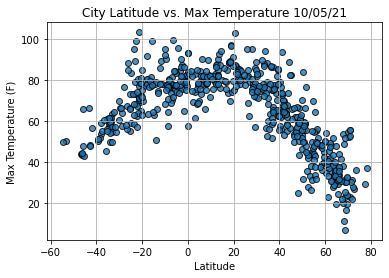

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

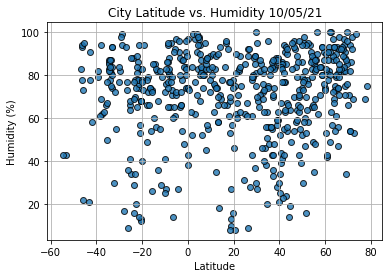

In [16]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

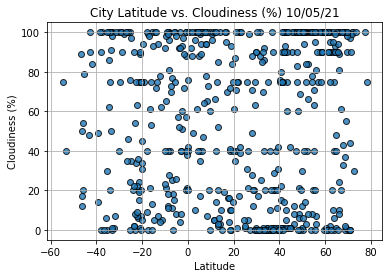

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

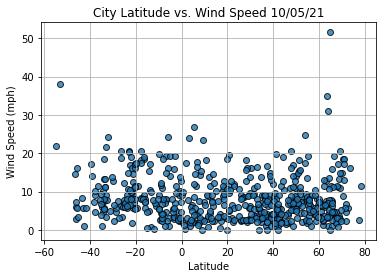

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()